In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

## Theory of Chebyshev Polynomials

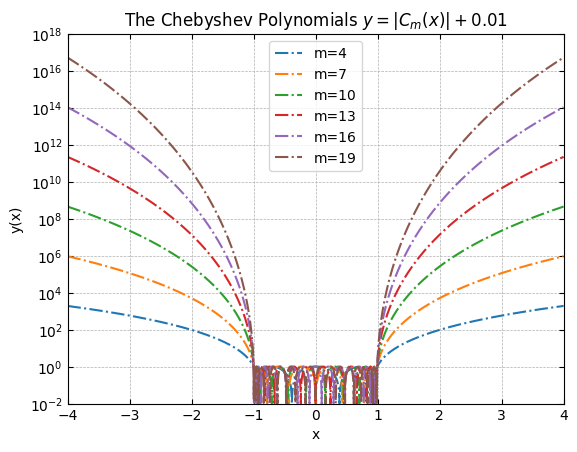

In [37]:
#Create an array from -2 to 2 with 1000 points
x = np.linspace(-4, 4, 100000)

#Write a code for finding m the first kind chebyshev polynomial
m = 20
T = np.zeros((m, x.size))
T[0] = np.ones(x.size)
T[1] = x
C=np.zeros((m, x.size))
for i in range(2, m):
    T[i] = 2*x*T[i-1] - T[i-2] + 0.01

for i in range (m):
    C[i] = np.abs(T[i])+0.01

#Plot the first kind chebyshev polynomial
plt.figure()
for i in range(4,m,3):
    plt.plot(x, C[i], label="m={}".format(i), linestyle="-.")
plt.legend()
plt.xlabel("x")
plt.ylabel("y(x)")
# y range from 10^-2 to 10^18
plt.ylim(1e-2, 1e18)
plt.xlim(-4, 4)
#y in semi log
plt.yscale("log")
# show ticks on both sides
plt.tick_params(axis='both', direction='in')
# Show ticks on right as well as top
plt.tick_params(top=True, right=True)
# Add labels on y axis after 10^2
plt.yticks([1e-2, 1e0, 1e2, 1e4, 1e6, 1e8, 1e10, 1e12, 1e14, 1e16, 1e18], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$", "$10^{6}$", "$10^{8}$", "$10^{10}$", "$10^{12}$", "$10^{14}$", "$10^{16}$", "$10^{18}$"])

plt.title("The Chebyshev Polynomials $y = |C_m(x)|+0.01$")
plt.grid( linestyle='--', linewidth=0.5)
plt.show()


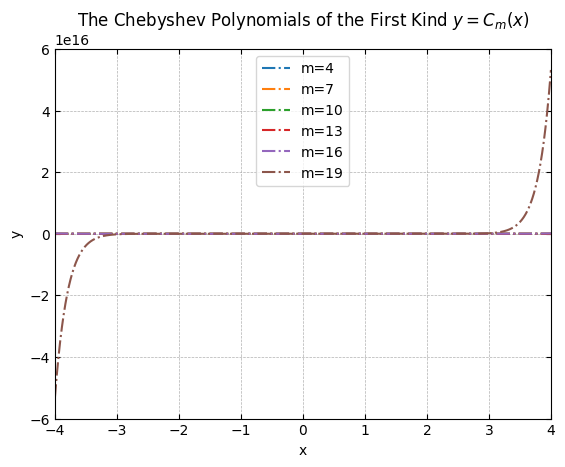

In [38]:
plt.figure()
for i in range(4,m,3):
    plt.plot(x, T[i], label="m={}".format(i), linestyle="-.")
plt.legend( loc='upper center')
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(axis='both', direction='in')
plt.tick_params(top=True, right=True)
plt.title("The Chebyshev Polynomials of the First Kind $y=C_m(x)$")
plt.xlim(-4,4)
plt.ylim(-6e16,6e16)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

## The condition number problem!!

In [39]:
def condition_number(n, N):
    
    # Create a random symmetric matrix of size n x n
    H = np.random.randn(n, n) +1j*np.random.randn(n, n)
    H = 0.5 * (H + H.conj().T)  # Ensuring symmetry
    cond_H = np.linalg.cond(H)

    # Compute the minimum eigenvalue of H
    eigenvals= np.linalg.eigvalsh(H)
    a_L=np.max(np.abs(eigenvals))

    # Create a random matrix of size n x N
    A = np.random.randn(n, N) + 1j*np.random.randn(n, N)
    cond_A = np.linalg.cond(A)

    # Create a random vector of size n x 1
    b = np.random.randn(n, 1) + 1j*np.random.randn(n, 1)

    # Compute Chebyshev polynomials iteratively
    B = np.empty((n, N), dtype=np.complex128)
    B[:, 0] = (b).flatten()

    if N > 1:
        B[:, 1] = ((H/a_L) @ b).flatten()

    T_k_prev=1
    T_k_curr=a_L
    T_prev = np.eye(n)  # T_0 = I
    T_curr = H          # T_1 = H

    for i in range(2, N):
        T_next = 2 * H @ T_curr - T_prev
        T_k_next=2*a_L*T_k_curr-T_k_prev
        B[:, i] = ((T_next/T_k_next) @ b).flatten()
        T_prev, T_curr = T_curr, T_next  # Move forward in recurrence
        T_k_prev, T_k_curr=T_k_curr, T_k_next

    cond_B = np.linalg.cond(B)

    # Compute power-based matrix `C` iteratively
    C = np.empty((n, N),dtype=np.complex128)
    C[:, 0] = b.flatten()
    for i in range(1, N):
        C[:, i] = (H @ C[:, i - 1]).flatten()  # Avoid unnecessary slicing

    cond_C = np.linalg.cond(C)

    return cond_H, cond_A, cond_B, cond_C


In [40]:
n=[10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
N=10
cond_H=[]
cond_A=[]
cond_B=[]
cond_C=[]
for i in n:
    a,b,c,d=condition_number(i,N)
    cond_H.append(a)
    cond_A.append(b)
    cond_B.append(c)
    cond_C.append(d)
    

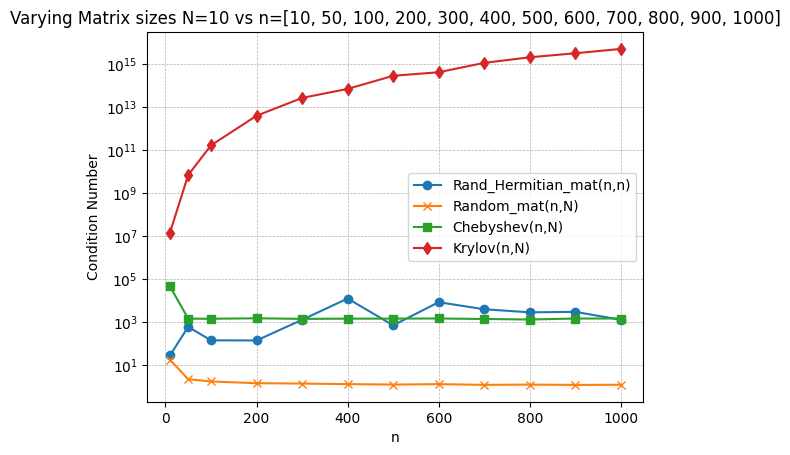

In [41]:
# Plot
plt.figure()
plt.plot(n, cond_H, label="Rand_Hermitian_mat(n,n)", marker="o")
plt.plot(n, cond_A, label="Random_mat(n,N)", marker="x")
plt.plot(n, cond_B, label="Chebyshev(n,N)", marker="s")
plt.plot(n, cond_C, label="Krylov(n,N)", marker="d")
plt.legend()
plt.yscale("log")
# plt.xscale("log")
plt.xlabel("n")
plt.ylabel("Condition Number")
plt.title(f"Varying Matrix sizes {N=} vs {n=}", fontsize=12)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

In [42]:
n=100
N=[5, 10, 15, 20 ,25, 30, 35, 50]
cond_H_=[]
cond_A_=[]
cond_B_=[]
cond_C_=[]
for i in N:
    a,b,c,d = condition_number(n,i)
    cond_H_.append(a)
    cond_A_.append(b)
    cond_B_.append(c)
    cond_C_.append(d)

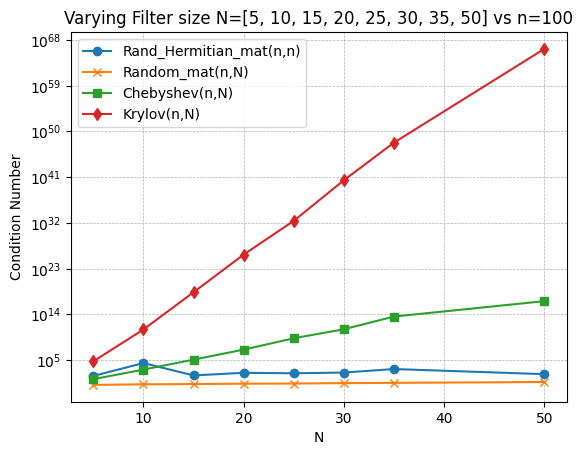

In [43]:
#Plot
plt.figure()
plt.plot(N, cond_H_, label="Rand_Hermitian_mat(n,n)", marker="o")
plt.plot(N, cond_A_, label="Random_mat(n,N)", marker="x")
plt.plot(N, cond_B_, label="Chebyshev(n,N)", marker="s")
plt.plot(N, cond_C_, label="Krylov(n,N)", marker="d")
plt.legend()
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Condition Number")
plt.title(f"Varying Filter size {N=} vs {n=}", fontsize=12)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

## Comparison of Cholesky Factorization, Diagonalization and Hybrid Methods for Solving EVP

In [177]:
# Generate a Real Symmetric Matrix
def generate_hermitian_matrix(M, N):
    """Generates an n x n random Hermitian matrix."""
    H = np.random.randn(M, M) + 1j * np.random.randn(M, M)  # Random complex matrix
    H = (H + H.conj().T) / 2  # Ensure Hermitian property
    # a_0 = np.min(np.linalg.eigvalsh(H))
    # b = np.max(np.linalg.eigvalsh(H))
    # a = (((b-a_0)/n)*N) +a_0
    # H = (H - (a+b)/2)/((b-a)/2) * np.eye(n)  # Normalize eigenvalues to [-1, 1]

    # Generate a random orthogonal matrix
    Q, _ = np.linalg.qr(np.random.randn(M, M) + 1j * np.random.randn(M, M))
    # Generate a diagonal matrix with most of the entries less than -1
    D = np.diag(np.random.randn(M) - 1)
    H = Q @ D @ Q.conj().T  # Construct the Hermitian matrix    
    return H

def Chebyshev_poly(H,k):
    M = H.shape[0]
    T_curr = np.eye(M)
    T_next = H
    a_0 = np.min(np.linalg.eigvalsh(H))
    b = np.max(np.linalg.eigvalsh(H))
    a = (((b - a_0)/M)*N) + a_0
    H = (H - ((a+b)/2)*np.eye(M))/((b-a)/2)  # Normalize eigenvalues to [-1, 1]
    for i in range(2, k+1):
        T_next = 2 * H @ T_next - T_curr
        T_curr = T_next

    return T_next

def Chebyshev_scalar_poly(H,x,k):
    x = np.min(np.linalg.eigvalsh(H))
    T_curr=1
    T_next=x

    for i in range(2, k+1):
        T_next = 2 * x * T_next - T_curr
        T_curr = T_next

    return T_next

## Method 1: Cholesky Factorization

In [178]:
def ChFSI_cholalgo(Psi, T_kH):
        
        # Chebyshev Filtering
        Psi_F = T_kH @ Psi

        # Overlap Matrix
        S = Psi_F.conj().T @ Psi_F
        
        #Cholesky decomposition
        L = np.linalg.cholesky(S)
        
        # orthogonalization
        Psi = Psi_F @ (np.linalg.inv(L).conj().T)

        return Psi


def ChFSI_chol(Psi, H, N, k, epsilon, max_iter):
    # H is a Hermitian Matrix
    # N is the number of eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter

    # M is the dimension of H matrix
    M = H.shape[0]

    #Initializing matrices and variables
    itr=0
    residual = []
    residual_norm = np.empty(N)
    residual.append(1e16)
    eigenvals = np.zeros((max_iter,N),dtype=complex)
    eigvecs = np.zeros((M,N),dtype=complex)
    a_L = np.max(np.abs(np.linalg.eigvalsh(H)))
    T_kH=Chebyshev_poly(H,k)/Chebyshev_scalar_poly(H,a_L,k)

    # Algorithm
    while itr+1 <= max_iter:

        if residual[itr] <= epsilon:
            break
        
        Psi = ChFSI_cholalgo(Psi, T_kH)
        
        # error
        for i in range(N):
            eigenvals[itr,i] = Psi[:,i].conj().T @ H @ Psi[:,i]
            eigvecs[:,i] = Psi[:,i]
              
        # residual.append(np.max(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]), axis=0, ord=2)))
        residual.append(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]),ord=2))

        itr+=1
        

    return eigenvals[itr-1,:], eigvecs, itr, residual

## Method 2: Eigenvalue Decomposition

In [179]:
def generalized_eigenproblem(H, S):
    """ Solves the generalized eigenvalue problem H X = S X Lambda """
    # Cholesky decomposition of S (S = L L^T)
    L = np.linalg.cholesky(S)
    
    # Transform H to standard eigenvalue problem
    Linv = np.linalg.inv(L)
    H_tilde = Linv @ H @ Linv.conj().T  # Equivalent to L^{-1} H L^{-dag}

    # Solve standard eigenvalue problem
    eigenvals, Q = np.linalg.eigh(H_tilde)

    # Recover original eigenvectors
    eigenvecs = np.linalg.inv(L.conj().T) @ Q

    return eigenvals, eigenvecs

def ChFSI_diagalgo(Psi, H, T_kH):

        # Chebyshev Filtering
        Psi_F = T_kH @ Psi

        # Projected Matrix
        H_proj = Psi_F.conj().T @ H @ Psi_F

        # Overlap Matrix
        S = Psi_F.conj().T @ Psi_F
        
        # Diagonalization
        eigenval, eigenvec = generalized_eigenproblem(H_proj, S)
  
        # orthogonalization
        Psi = Psi_F @ eigenvec

        return eigenval, Psi


def ChFSI_diag(Psi, H, N, k, epsilon, max_iter):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter

    # M is the dimension of H matrix
    M = H.shape[0]

    # Initialization of the variables
    # Psi = np.random.randn(M, N) +1j * np.random.randn(M,N)
    itr=0
    residual = []
    residual_norm = np.empty(N)
    residual.append(1e16)
    eigenvals = np.zeros([max_iter,N],dtype=complex)
    eigvecs = np.zeros([M,N],dtype=complex)
    a_L = np.max(np.abs(np.linalg.eigvalsh(H)))
    T_kH=Chebyshev_poly(H,k)/Chebyshev_scalar_poly(H,a_L,k)

    # Algorithm
    while itr+1 <= max_iter:

        if residual[itr] <= epsilon:
            break

        eigenval, Psi = ChFSI_diagalgo(Psi,H,T_kH)
        
        # error
        for i in range(N):
            eigenvals[itr,i] = eigenval[i]
            eigvecs[:,i] = Psi[:,i]
            
        # residual.append(np.max(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]), axis=0, ord=2)))
        residual.append(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]),ord=2))

        itr+=1

    return eigenvals[itr-1,:], eigvecs, itr, residual

## Method 3: Hybrid Method

In [204]:
def ChFSI_hybd(Psi, H, N, k, a, epsilon, max_iter):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter
    # a is the period of algorithm to be used

    # M is the dimension of H matrix
    M = H.shape[0]

    #Initializing matrices and variables
    itr=0
    residual = []
    residual_norm = np.empty(N)
    residual.append(1e16)
    eigenvals = np.zeros([max_iter,N],dtype=complex)
    eigvecs = np.zeros([M,N],dtype=complex)
    a_L = np.max(np.abs(np.linalg.eigvalsh(H)))
    T_kH=Chebyshev_poly(H,k)/Chebyshev_scalar_poly(H,a_L,k)

    # Algorithm
    while itr+1 <= max_iter:

        if residual[itr] <= epsilon:
            break
        
        if ((itr % a) == 0): #or ((itr+1)==max_iter)) and (itr!=0):
            eigenval, Psi = ChFSI_diagalgo(Psi,H,T_kH)
            for i in range(N):
                eigenvals[itr,i] = eigenval[i]
                eigvecs[:,i] = Psi[:,i]

        else:
            Psi = ChFSI_cholalgo(Psi,T_kH)
            for i in range(N):
                eigenvals[itr,i] = Psi[:,i].conj().T @ H @ Psi[:,i]
                eigvecs[:,i] = Psi[:,i]
                
        residual.append(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]),ord=2))
        # residual.append(np.max(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]), axis=0, ord=2)))

        itr+=1

    return eigenvals[itr-1,:], eigvecs, itr, residual

In [205]:
# Parameters
M = 1000  # Dimension of the matrix
N = 5  # Number of eigenvalues
k = 10  # Degree of the Chebyshev polynomial filter
epsilon = 1e-11  # Tolerance for convergence
max_iter = 1000 # Maximum number of iterations
a = 100 # Period of the algorithm for Hybrid Algorithm
Psi = np.random.randn(M, N) +1j * np.random.randn(M,N)

In [208]:
# Solving the problem
H = generate_hermitian_matrix(M,N)
eigenvals_diag,eigenvecs_diag, itr_diag, residual_diag = ChFSI_diag(Psi, H, N, k, epsilon, max_iter)
eigenvals_chol,eigenvecs_chol, itr_chol, residual_chol = ChFSI_chol(Psi, H, N, k, epsilon, max_iter)
eigenvals_hybd, eigenvecs_hybd, itr_hybd, residual_hybd = ChFSI_hybd(Psi, H, N, k, a, epsilon, max_iter)
eigenvecs, eigenvals = np.linalg.eigh(H)

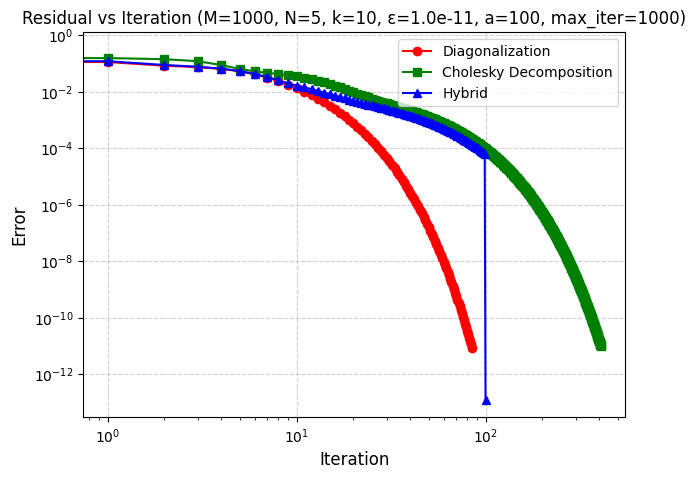

In [209]:
# Plot the error
plt.figure(figsize=(7, 5))
plt.title(f"Residual vs Iteration (M={M}, N={N}, k={k}, ε={epsilon:.1e}, a={a}, max_iter={max_iter})")

plt.plot(np.arange(len(residual_diag)-1), residual_diag[1:], marker='o',  label="Diagonalization", color="red")
plt.plot(np.arange(len(residual_chol)-1), residual_chol[1:], marker='s',  label="Cholesky Decomposition",color="green")
plt.plot(np.arange(len(residual_hybd)-1), residual_hybd[1:], marker='^',  label="Hybrid",color="blue")

plt.yscale("log")
plt.xscale("log")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Error", fontsize=12)
# Legend adjustments
plt.legend()
plt.show()

In [197]:
print("Eigenvalues (Diagonalization):", eigenvals_diag)
print("Eigenvalues (Cholesky):", eigenvals_chol)
print("Eigenvalues (Hybrid):", eigenvals_hybd)
print("Eigenvalues (Exact):", eigenvals)

Eigenvalues (Diagonalization): [-3.55863524+0.j -3.30414412+0.j -2.95691144+0.j -2.94506071+0.j
 -2.61012752+0.j]
Eigenvalues (Cholesky): [-3.55863524+2.22044605e-16j -3.30414412-4.16333634e-17j
 -2.95691144+1.66533454e-16j -2.94506071+6.93889390e-17j
 -2.61012752-2.77555756e-17j]
Eigenvalues (Hybrid): [-3.55863524+1.66533454e-16j -3.30414412+2.77555756e-17j
 -2.95691144-2.77555756e-17j -2.94506071-1.38777878e-17j
 -2.61012752-1.66533454e-16j]
Eigenvalues (Exact): [[-0.07495228+0.j          0.11227724+0.j          0.13802831+0.j
  ... -0.10826327+0.j          0.04053251+0.j
  -0.03564655+0.j        ]
 [ 0.02697066-0.14535011j  0.03101287+0.09060567j  0.0539938 +0.02319526j
  ...  0.00212392+0.04039681j -0.00746533-0.05998491j
  -0.01861063-0.04852588j]
 [ 0.06339133-0.0912133j  -0.06569296-0.00337073j  0.04777184+0.00305589j
  ...  0.03682893-0.03839844j -0.04648135-0.03176596j
  -0.07186696-0.06042133j]
 ...
 [-0.04562508-0.00603328j -0.20203364+0.03562839j  0.03138563-0.00402949j
  .

In [143]:
print("Eigenvecs (Diagonalization):", eigenvecs_diag)
print("Eigenvecs (Cholesky):", eigenvecs_chol)
print("Eigenvecs (Hybrid):", eigenvecs_hybd)
print("Eigenvecs (Exact):", eigenvecs)

Eigenvecs (Diagonalization): [[-0.02734069+2.69442406e-02j  0.01056957-9.45250565e-04j
  -0.00525185+8.48859932e-03j -0.02262106+1.12648325e-02j
   0.00204876+9.69595027e-03j]
 [ 0.05329823-2.99885331e-04j  0.01301106+3.68839193e-02j
  -0.01298642+1.75649496e-02j -0.00140577+3.04266932e-02j
  -0.0063945 +3.03313410e-02j]
 [-0.01360832-2.23493182e-02j  0.02262046+2.91638080e-02j
  -0.03448157+2.05520182e-02j  0.0126646 -3.06459397e-02j
   0.01973389+2.78620762e-02j]
 ...
 [ 0.01007255+6.54183101e-03j -0.00678526+1.94284772e-02j
   0.00510337+5.47064613e-03j  0.01525456+1.57146149e-02j
  -0.00687694-5.51256313e-05j]
 [ 0.01336247+6.52654219e-03j  0.01275267-1.49067984e-02j
  -0.03189924+2.39443278e-03j  0.01397683+5.33219039e-02j
  -0.03042993-3.43732268e-03j]
 [-0.01072718+1.35588925e-02j  0.03120321-9.03857169e-03j
   0.00087773+2.44358671e-02j  0.01064956-8.10029042e-03j
   0.04750933+1.28800577e-02j]]
Eigenvecs (Cholesky): [[-0.01573891+0.03501131j -0.00155484-0.01049723j -0.00974327